In [1]:
import numpy as np

obs = np.load('/Users/adam/git/world-models/saves/one/obs.npy')

In [2]:
obs.dtype

dtype('float64')

In [3]:
import matplotlib.pyplot as plt
f, a = plt.subplots()
proc = ((255*obs).round()).astype(np.uint8)

from PIL import Image
from scipy.misc import imresize as resize
img = Image.fromarray(proc[5, :, :, :]).resize((64*3, 64*3))
a.imshow(img)

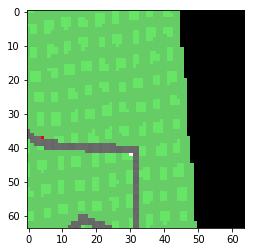

In [4]:
f, a = plt.subplots()
a.imshow(obs[5, :, :, :])

## Comparing image processing

In [5]:

from gym.envs.box2d.car_racing import CarRacing

env = CarRacing()

In [6]:
o = env.reset()

for _ in range(100):
    o, r, no, d = env.step(env.action_space.sample())
    env.viewer.window.dispatch_events()
env.close()

Track generation: 1213..1525 -> 312-tiles track


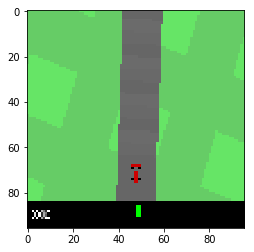

In [7]:
f, a = plt.subplots()
a.imshow(o[:, :, :])

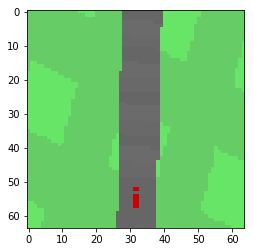

In [12]:
def process_frame(frame, screen_size=None, vertical_cut=-1, max_val=255, save_img=False):
    """ could be two functions  - resizing and saving"""
    frame = frame[:vertical_cut, :, :]
    frame = Image.fromarray(frame, mode='RGB')

    obs = frame.resize(screen_size)
    if save_img:
        frame.save(results_dir+'/debug/raw_frame{}.png'.format(save_img), 'PNG')
        obs.save(results_dir+'/debug/processed().png'.format(save_img), 'PNG')
    return np.array(obs) / max_val

f, a = plt.subplots()
a.imshow(process_frame(o, screen_size=(64, 64), vertical_cut=84))

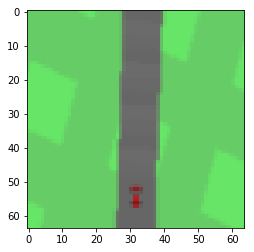

In [8]:
def process_frame(frame, screen_size=None, vertical_cut=-1, max_val=255, save_img=False):
    """ could be two functions  - resizing and saving"""
    frame = frame[:vertical_cut, :, :]
    frame = Image.fromarray(frame, mode='RGB')

    obs = frame.resize(screen_size, Image.BILINEAR)
    if save_img:
        frame.save(results_dir+'/debug/raw_frame{}.png'.format(save_img), 'PNG')
        obs.save(results_dir+'/debug/processed().png'.format(save_img), 'PNG')
    return np.array(obs) / max_val

f, a = plt.subplots()
a.imshow(process_frame(o, screen_size=(64, 64), vertical_cut=84))

/Users/adam/.pyenv/versions/3.6.8/envs/world-models/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until


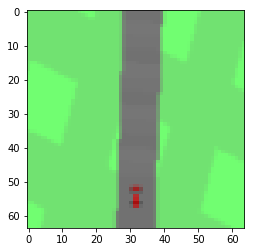

In [10]:
def _process_frame(frame):
    obs = frame[0:84, :, :].astype(np.float)/255.0
    obs = resize(obs, (64, 64))
    obs = ((1.0 - obs) * 255).round().astype(np.uint8)
    return obs

f, a = plt.subplots()
a.imshow(_process_frame(o))